<a href="https://colab.research.google.com/github/ti-molodykh/colab/blob/main/%E2%84%968_Python_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 8

## Отток клиентов телеком компании
### Что такое "скорость оттока"?

Коэффициент оттока - это процент подписчиков на услугу, которые прекращают свою подписку на услугу в течение заданного периода времени. Для того чтобы компания могла расширить свою клиентуру, ее темпы роста, измеряемые числом новых клиентов, должны превышать темпы оттока. Этот показатель обычно выражается в процентах.

### Почему отток так важен?

Отток клиентов - это термин, используемый в компаний с подписочной моделью ведения бизнеса, для описания потери клиентов. Например, если 10 из 100 подписчиков интернет-провайдера (ISP) отменили свои подписки, скорость оттока для этого провайдера составит 10%.

Отток важен, потому что он напрямую влияет на прибыльность вашего сервиса. Принято считать, что прибыльность услуги напрямую связана с ростом ее клиентской базы. Это может привести владельцев бизнеса к выводу, что для того, чтобы увеличить свою клиентскую базу, скорость приобретения новых клиентов должна превышать скорость оттока.

### Что из себя представляет датасет?

Датасет представляет из себя 3333 записи из истории компании о клиентах с 20 колонками. Каждая колонка описывает клиента - его штат проживания, время использования услуги, номер, перечень подписок, время разговора, прочее.

##### Более конкретно
-   State: штат США, в котором проживает клиент, обозначенный двухбуквенным сокращением; например, OH или NJ
-   Account Length: количество дней, в течение которых этот аккаунт был активным
-   Area Code: трехзначный код города соответствующего номера телефона клиента
-   Phone: оставшийся семизначный номер телефона
-   Int’l Plan: есть ли у клиента международный тарифный план: да / нет
-   VMail Plan: есть ли у клиента функция голосовой почты: да / нет
-   VMail Message: предположительно среднее количество сообщений голосовой почты в месяц
-   Day Mins: общее количество минут, использованных в течение дня
-   Day Calls: общее количество звонков за день
-   Day Charge: оплачиваемая стоимость дневных звонков
-   Eve Mins, Eve Calls, Eve Charge: оплачиваемая стоимость звонков, сделанных в течение вечера
-   Night Mins, Night Calls, Night Charge: оплачиваемая стоимость звонков в ночное время
-   Intl Mins, Intl Calls, Intl Charge: расчетная стоимость международных звонко
-   CustServ Calls: количество звонков в службу поддержки
-   Churn?: клиент ушёл: да / нет

## Exploratory data analysis
Поработаем еще немного с pandas, любой анализ начинается с осмотра данных, мы уже обсуждали с вами пропуски и выбросы, а также типы данных, все это является частью этого анализа. Помимо этого, на этом этапе мы можем выдвигать определенные гипотезы, и пытаться провалидировать их с помощью графиков и таблиц. Если нашей целью является построение модели для предсказания какой-то переменной (об этом мы будем говорить позднее в нашем курсе), то на этапе осмотра данных, мы можем попытаться сформулировать некие эвристики, которые помогут сформировать нам базовое решение (так называемый baseline), от которого мы сможем отталкиваться при построении моделей. Помимо этого, на этом этапе мы можем обнаружить, что некоторые признаки явно не влияют на целевую переменную или по ним представлено мало статистики, что будет говорить о том, что мы можем данные признаки не рассматривать в дальнейшем, так как от них нет никакой пользы, либо решающее правило, сформированное по ним будет очень неточным.

[Данные](https://drive.google.com/file/d/1PPx68Oi3DwgC97vwfBvVsD3SHK8p8-H0/view?usp=sharing)

Начнем с загрузки данных, а также с первичного осмотра

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option("display.precision", 2)

In [ ]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.shape

(3333, 21)

In [ ]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


Обратите внимание, что describe() по умолчанию приводит статистику только для числовых полей, мы можем изменить это поведение, добавив в рассмотрение дополнительные типы данных. Это можно сделать с помощью параметра include.

In [ ]:
df.describe(include=['object', 'bool'])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,382-4657,no,no,False
freq,106,1,3010,2411,2850


Посмотрим на соотношение между ушедшими и оставшимися клиентами. Забегая вперед, дисбаланс классов, это важный момент, который необходимо учитывать при построении моделей.

In [ ]:
df.shape

(3333, 21)

In [ ]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [ ]:
df['churn'].value_counts(normalize=True)

False    0.86
True     0.14
Name: churn, dtype: float64

Если бы мы с вами делали классификатор, то мы могли бы сказать, что нам нужна точность (процент правильных ответов), по крайней мере выше, чем 0.86, поскольку мы можем достигнуть такого качества просто присваивая всем объектом значение перемнной 'churn', равное False.

Попробуем руками найти факторы, влияющие на отток клиентов

Какова максимальная продолжительность международных звонков среди постоянных пользователей (Churn == 0), у которых нет международного плана?

In [ ]:
df[(df['churn'] == 0) & (df['international plan'] == 'no')]['total intl minutes'].max()

18.9

Данное значение существенно больше среднего (см. вывод .describe())

А каково соотношение ушедших и не ушедших среди тех, кто пользуется и не пользуется международным планом?

In [ ]:
pd.crosstab(df['churn'], df['international plan'])

international plan,no,yes
churn,,
False,79.93,5.58
True,10.38,4.11


In [ ]:
pd.crosstab(df['churn'], df['international plan'], normalize=True)

international plan,no,yes
churn,,
False,0.8,0.06
True,0.1,0.04


Мы видим, что среди тех, кто пользуется международным планом соотношение между ушедшими и не ушедшими близко к паритету, чего не скажешь про тех, кто им не пользуется. Предположительно, клиенты пользующиеся международным планом находятся группе с меньшим риском ухода от нас.

In [ ]:
pd.crosstab(df['churn'], df['voice mail plan'], normalize=True)

voice mail plan,no,yes
churn,,
False,0.60,0.25
True,0.12,0.02


In [ ]:
df['voie']

Voice mail plan не так явно влияет, отношение не настолько кардинально меняется

In [ ]:
0.02 / 0.27


0.07407407407407407

In [ ]:
0.12/0.72

0.16666666666666666

Различаются ли длительности звонков в разных географических зонах?

In [ ]:
df.pivot_table(['total day calls', 'total eve calls', 'total night calls'],
               ['area code'], aggfunc='mean')

,total day calls,total eve calls,total night calls
area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


Похоже, что не особо

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

То же, мы можем отобразить на столбчатой диаграмме

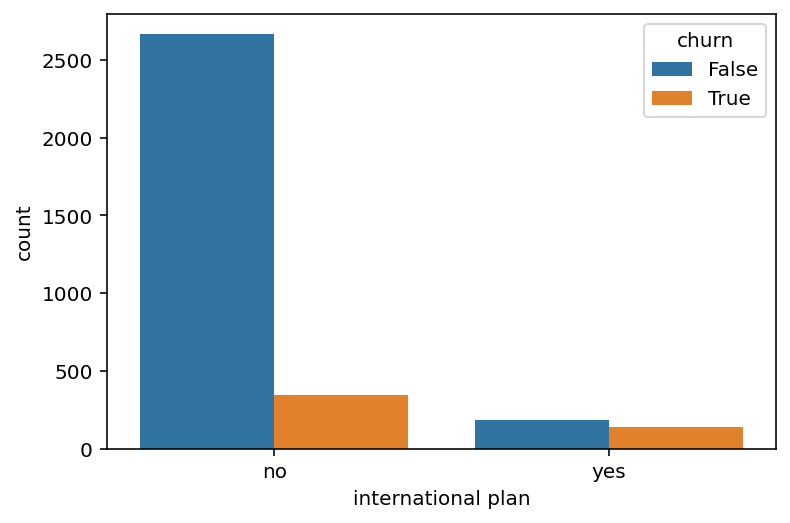

In [ ]:
sns.countplot(x='international plan', hue='churn', data=df)

Посмотрим, влияет ли кол-во звонков в сервис от клиента на шанс ухода

In [ ]:
pd.crosstab(df['churn'], df['customer service calls'], margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


In [ ]:
доля_0 = 92 / (92 + 605)
доля_1 = 122 / (1059 + 122)
доля_2 = 87 / (672 + 87)
доля_3

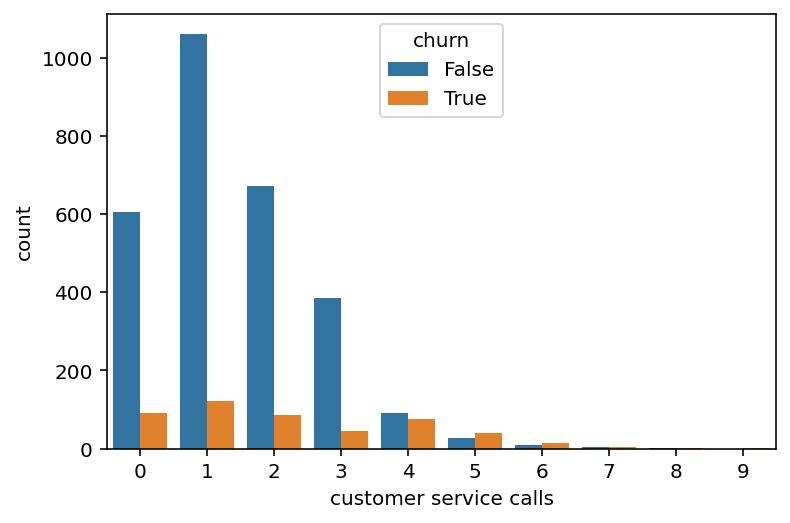

In [ ]:
sns.countplot(x='customer service calls', hue='churn', data=df)

Мы видим, что чем больше становится звонков в сервис, тем больше процентное соотношение ушедших в категории

Сделаем специальную бинарную колонку, скажем, что больше 3 звонков это "много"

In [ ]:
df['many_service_calls'] = (df['customer service calls'] > 3).astype('int')

pd.crosstab(df['many_service_calls'], df['churn'], margins=True)

churn,False,True,All
many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


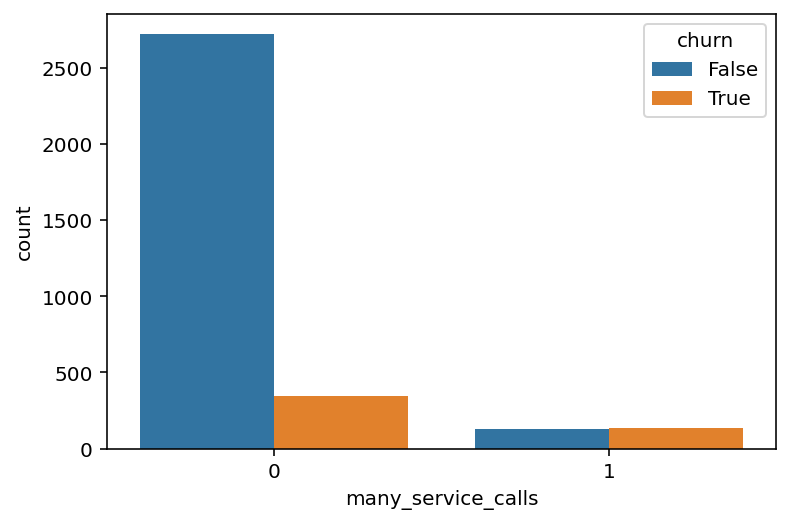

In [ ]:
sns.countplot(x='many_service_calls', hue='churn', data=df)

Данный график также показывает изменение соотношения

In [ ]:
df['dttm'] = '2022-01-01'
df['quarter'] = pd.to_datetime(df['dttm']).dt.year * 10 + pd.to_datetime(df['dttm']).dt.month
df['quarter']

0       20221
1       20221
2       20221
3       20221
4       20221
        ...  
3328    20221
3329    20221
3330    20221
3331    20221
3332    20221
Name: quarter, Length: 3333, dtype: int64

In [ ]:
pd.to_datetime(df['dttm']).dt.year.apply(lambda x : str(x)[-2:]) + '_' + pd.to_datetime(df['dttm']).dt.month_name().apply(lambda x : x[:3])

0       22_Jan
1       22_Jan
2       22_Jan
3       22_Jan
4       22_Jan
         ...  
3328    22_Jan
3329    22_Jan
3330    22_Jan
3331    22_Jan
3332    22_Jan
Name: dttm, Length: 3333, dtype: object

In [ ]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'many_service_calls', 'dttm',
       'quarter'],
      dtype='object')

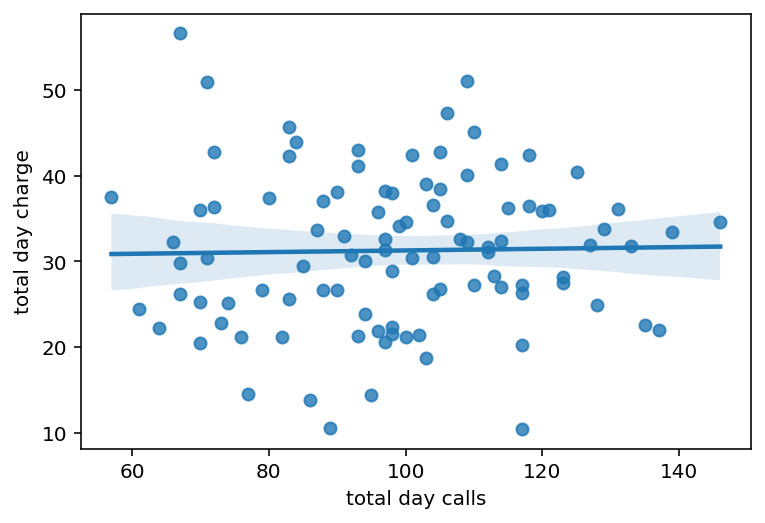

In [ ]:
sns.regplot(x="total day calls", y="total day charge", data=df[:100])

AttributeError: ignored

In [ ]:
df = pd.DataFrame({'dttm' : ['2022-01-01', '2021-09-18', '2022-04-12', '2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18','2022-01-01', '2021-09-18',]})
df

Теперь давайте составим простое решающее правило. Если у клиента много звонков в сервис, И при этом у него есть международный план, будем говорить, что он уйдет, в противном случае (т.е даже когда не выполняется одно из условий), будем говорить, что он останется.

In [ ]:
pd.crosstab(df['many_service_calls'] & df['international plan'].replace({'yes': 1, 'no': 0}), df['churn'])

# 85.8% > 85.5%. 


churn,False,True
row_0,,
0,2841,464
1,9,19
